## The Information About Dataset:
### Airline Satisfiction

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import pandas as pd
data_train = pd.read_csv('train.csv')
data_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
data_train.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [3]:
data_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## Now Let's Find The Distribution With Statistic :


In [4]:
def kullback_leibler(p, q):
    result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
    return result

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.figure(figsize=(10, 10))
data_train['Arrival Delay in Minutes'].fillna(data_train['Arrival Delay in Minutes'].mean(), inplace=True)
# mean         15.178678
# std          38.698682

<Figure size 720x720 with 0 Axes>

<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))


Text(0.5, 1.0, "if you see it's not a gussian distribution")

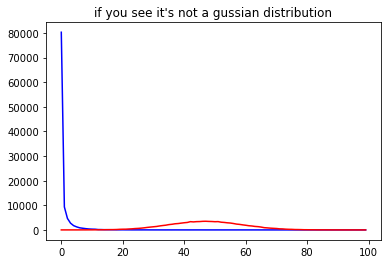

In [7]:
import numpy as np

count, _ = np.histogram(data_train['Arrival Delay in Minutes'], bins=100)

ideal = stats.norm.rvs(size=len(data_train['Arrival Delay in Minutes']), loc = 15.178678, scale = 38.698682)

ideal_count, ideal_ = np.histogram(ideal, bins=100)

kullback_leibler(count, ideal_count)
plt.plot(count, c='blue')
plt.plot(ideal_count, c='red')
plt.title("if you see it's not a gussian distribution")

In [8]:
#counts = count/100
#ideal_count = ideal_count / 100

In [9]:
#kullback_leibler(counts, ideal_count)

<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))


Text(0.5, 1.0, "if you see it's not a Possion distribution")

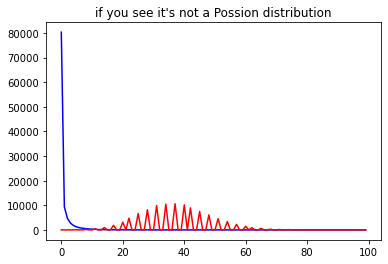

In [10]:
ideal_p = stats.poisson.rvs(15.178678, size=len(data_train['Arrival Delay in Minutes']))
ideal_count_possion, idealp_ = np.histogram(ideal_p, bins=100)
kullback_leibler(count, ideal_count_possion)
plt.plot(count, c='blue')
plt.plot(ideal_count_possion, c='red')
plt.title("if you see it's not a Possion distribution")

In [11]:
data_train['Age'].describe()
# mean         39.379706
# std          15.114964

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

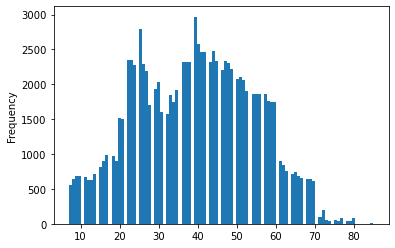

In [12]:
data_train['Age'].plot(kind='hist', bins=100)

97773.27630398856


<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))


Text(0.5, 1.0, "if you see it's not a Gussian distribution")

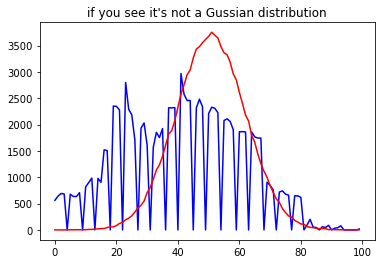

In [13]:
count_age, _ = np.histogram(data_train['Age'], bins=100)
ideal_age = stats.norm.rvs(size=len(data_train['Age']), loc = 39.379706, scale = 15.114964)
ideal_age_count, ideal_age_ = np.histogram(ideal_age, bins=100)

print(kullback_leibler(count_age, ideal_age_count))

plt.plot(count_age, c='blue')
plt.plot(ideal_age_count, c='red')
plt.title("if you see it's not a Gussian distribution")

<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))
<ipython-input-4-4ad02619322b>:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p!=0, q!=0), p * np.log(p/q), 0))


-9734.097854556816


Text(0.5, 1.0, "if you see it's kind of possion distribution")

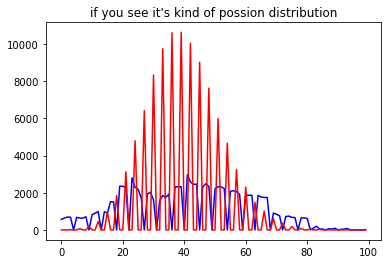

In [14]:
ideal_p_age = stats.poisson.rvs(15.178678, size=len(data_train['Age']))
ideal_count_age_possion, idealp_ = np.histogram(ideal_p_age, bins=100)
print(kullback_leibler(count_age, ideal_count_age_possion))
plt.plot(count_age, c='blue')
plt.plot(ideal_count_age_possion, c='red')
plt.title("if you see it's kind of possion distribution")

In [15]:
data_train.info()
# No null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Kstest:

In [16]:
from scipy.stats import kstest

In [17]:
kstest(data_train['Arrival Delay in Minutes'], data_train['Age'])
# what does it mean pvalue=0 means there from different distribution 

KstestResult(statistic=0.7143228364644287, pvalue=0.0)

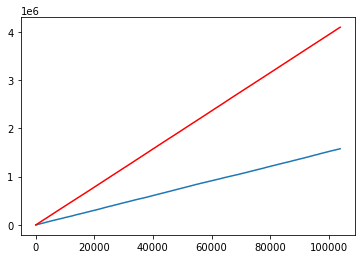

In [18]:
plt.plot(np.cumsum(data_train['Arrival Delay in Minutes']))
plt.plot(np.cumsum(data_train['Age']), c='red')

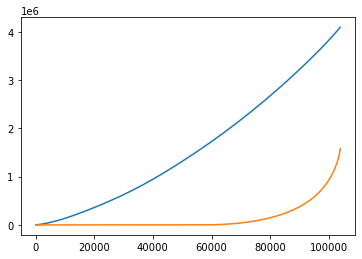

In [19]:
plt.plot(np.cumsum(data_train['Age'].sort_values().reset_index(drop=True)))
#plt.figure()
plt.plot(np.cumsum(data_train['Arrival Delay in Minutes'].sort_values().reset_index(drop=True)))

In [20]:
a = data_train['Age'] - data_train['Age'].mean()
b = data_train['Arrival Delay in Minutes'] - data_train['Arrival Delay in Minutes'].mean()


(array([8.0269e+04, 9.3300e+03, 4.6670e+03, 2.7480e+03, 1.7480e+03,
        1.2270e+03, 8.4900e+02, 6.7100e+02, 5.0600e+02, 3.8200e+02,
        3.1300e+02, 2.7900e+02, 1.5400e+02, 1.4100e+02, 9.7000e+01,
        8.4000e+01, 7.8000e+01, 6.2000e+01, 4.4000e+01, 3.6000e+01,
        4.2000e+01, 2.8000e+01, 2.7000e+01, 1.5000e+01, 1.6000e+01,
        1.5000e+01, 1.0000e+01, 1.3000e+01, 1.0000e+01, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

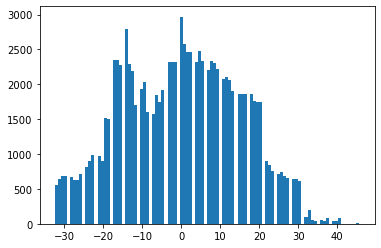

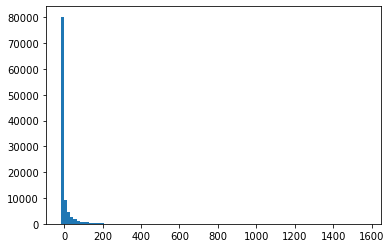

In [21]:
plt.hist(a, bins=100)
plt.figure()
plt.hist(b, bins=100)

In [22]:
stats.uniform.fit(data_train['Age'])
# to find parameter of specific distribution

(7.0, 78.0)

# AB Test :

## jensen shanon :


In [23]:
def jensen(p, q):
    p1 = p / np.linalg.norm(p, ord=1)
    q1 = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    return 0.5 * (stats.entropy(p1, m) + stats.entropy(q1, m))

In [24]:
print(data_train['Flight Distance'].describe()['mean'])
print(data_train['Flight Distance'].describe()['std'])

1189.4483754234677
997.1472805289596


In [25]:
#p
count, _ = np.histogram(data_train['Flight Distance'], bins=100)
#q
ideal = stats.norm.rvs(size=len(data_train['Flight Distance']), loc = 1189.4483754234677, scale = 997.1472805289596)
count_ideal, ideal_= np.histogram(ideal, bins=100)


In [26]:
jensen(count, count_ideal)

0.3251644119505554

Text(0.5, 1.0, "if you see it's kind of normal(gussian) distribution")

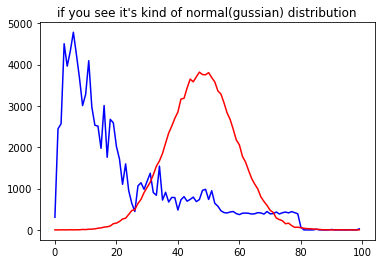

In [27]:
plt.plot(count, c='blue')
plt.plot(count_ideal, c='red')
plt.title("if you see it's kind of normal(gussian) distribution")

## Split Data Into Object And Int :
### Visualize

In [28]:
obj = list(data_train.select_dtypes(include='object'))
obj

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [29]:
number = list(data_train.select_dtypes(include=['float64', 'int64']))
number

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

<AxesSubplot:ylabel='satisfaction'>

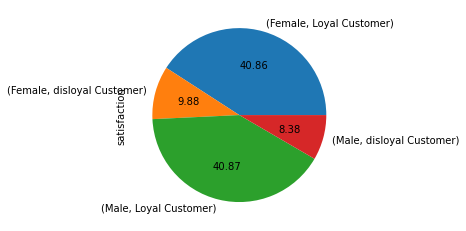

In [30]:
data_train.groupby(['Gender', 'Customer Type'])['satisfaction'].size().plot(kind='pie', autopct='%.2f')
# loyal Customer are more satisfiction than disrolay

<AxesSubplot:ylabel='Gender,Customer Type,Age'>

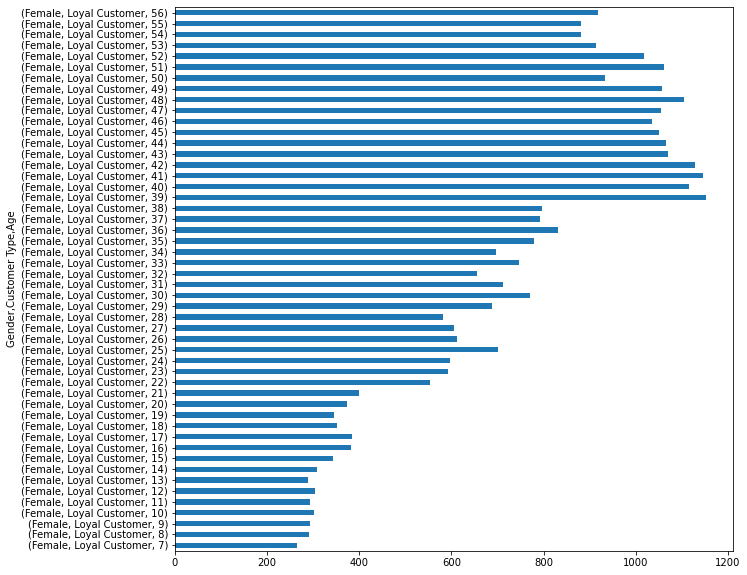

In [31]:
data_train.groupby(['Gender', 'Customer Type', 'Age'])['satisfaction'].size()[:50].plot(kind='barh', figsize=(10, 10))

In [32]:
a = data_train.groupby(['Gender', 'Flight Distance', 'Class'])['satisfaction'].size()

<AxesSubplot:ylabel='Gender,Flight Distance,Class'>

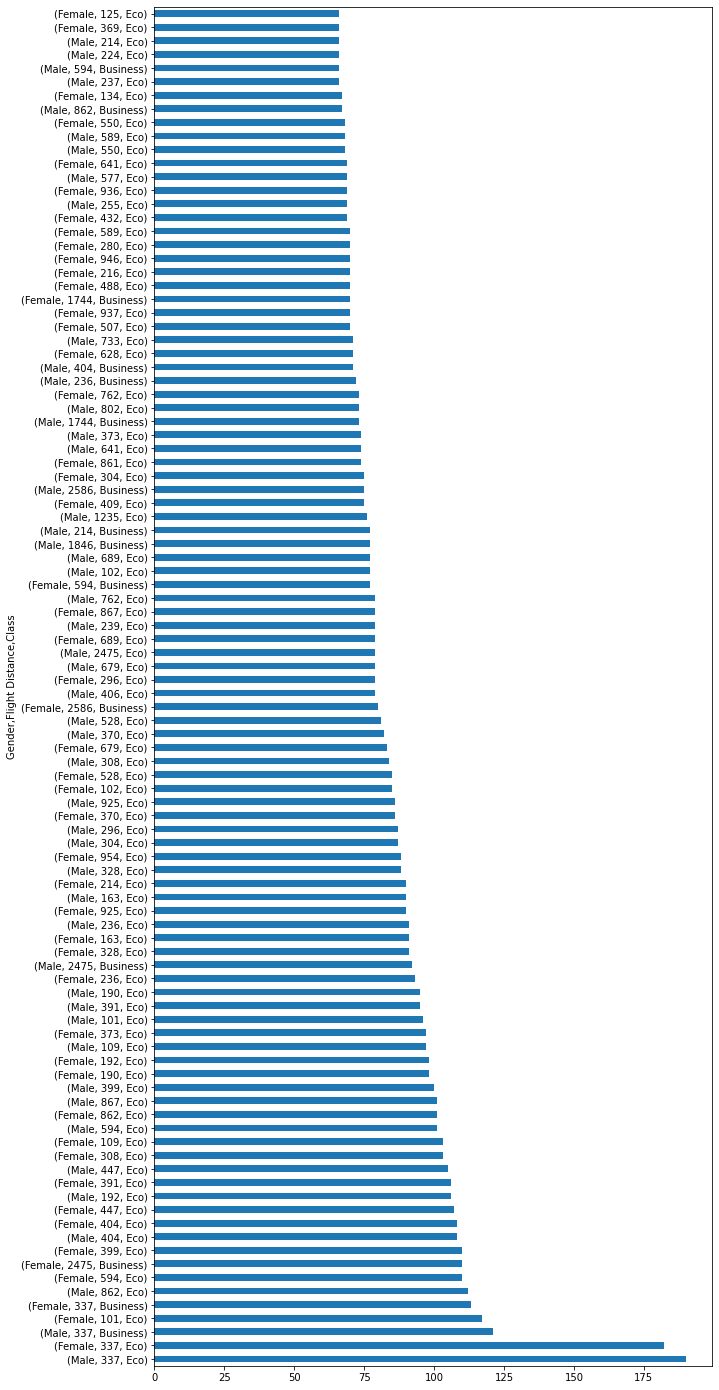

In [33]:
a.sort_values(ascending=False)[:100].plot(kind='barh', figsize=(10, 25))

<AxesSubplot:ylabel='Flight Distance,Class,Arrival Delay in Minutes'>

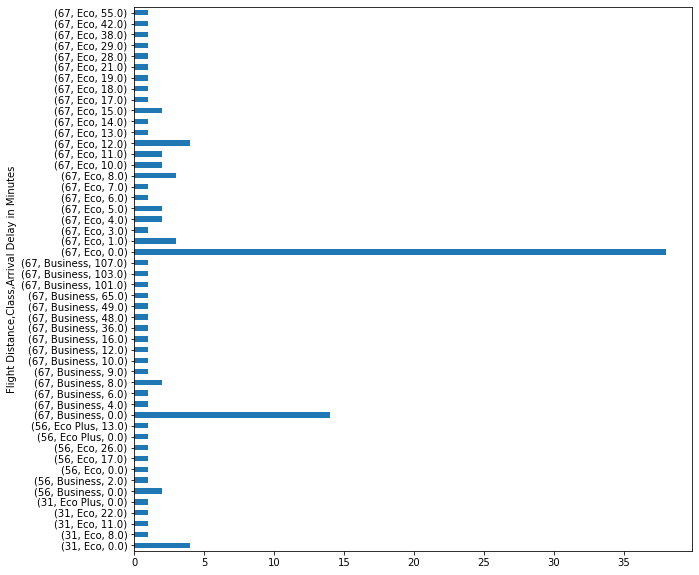

In [34]:
data_train.groupby(['Flight Distance', 'Class', 'Arrival Delay in Minutes'])['satisfaction'].size()[:50].plot(kind='barh', figsize=(10, 10))

In [35]:
data_train.iloc[:, 10:].columns

Index(['Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Most Feature Effect On Satisfiction:

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

In [37]:
best_fe = SelectKBest(chi2, k=10)

b = best_fe.fit(data_train.select_dtypes(include=['float64', 'int64']), data_train['satisfaction'])

data_train.select_dtypes(include=['float64', 'int64']).columns[b.get_support()]

Index(['Age', 'Flight Distance', 'Inflight wifi service', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:>

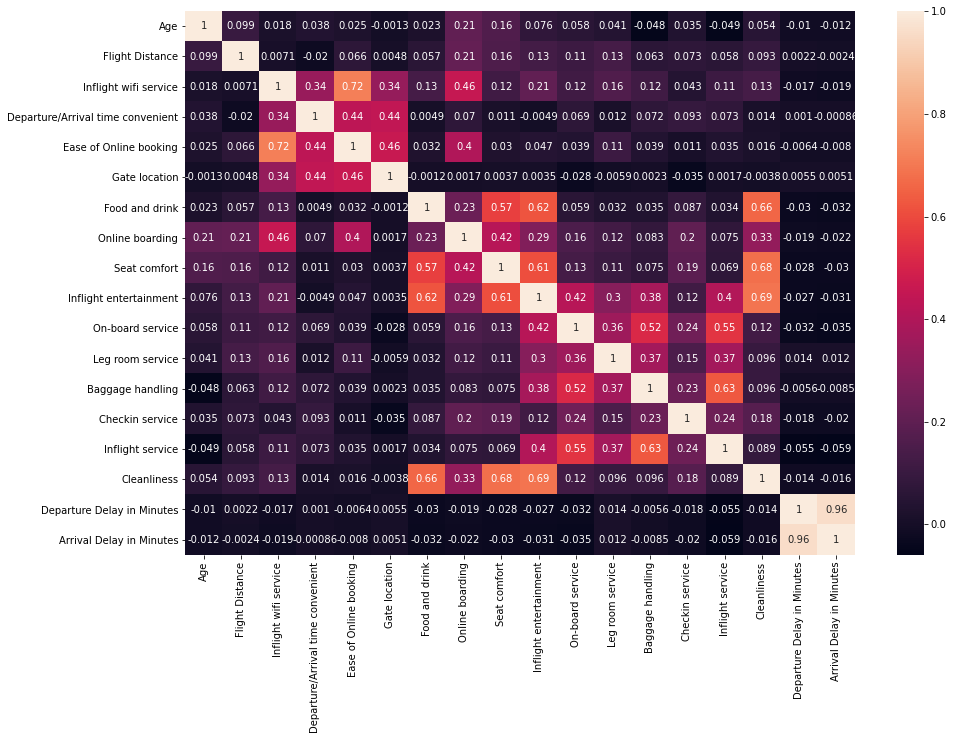

In [38]:
crr = data_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(crr, annot=True)

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, y_train = data_train.drop('satisfaction', axis=1), data_train['satisfaction']
x_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


## determine Best  Model Use:
### Use pairplot

In [40]:
#sns.pairplot(data_train, hue='satisfaction')

## Let's Trye OHE On Our Data And Save The Other Data As Same As Before If That Was Integer Or Float

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

In [42]:
col_transformer = make_column_transformer(
        (OneHotEncoder(), list(x_train.select_dtypes(include='object'))),
        remainder='passthrough')

x_train = col_transformer.fit_transform(x_train)

In [43]:
x_train = pd.DataFrame(x_train)

In [44]:
y_train = pd.get_dummies(y_train)

In [45]:
y_train.drop('neutral or dissatisfied',  inplace=True, axis=1)

In [46]:
y_train

,satisfied
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [47]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth=15)
d_tree.fit(x_train, y_train)
d_tree.score(x_train, y_train)

0.9740625962426855

### How Find Best Hyperparameter For Our Model:

In [48]:
param = {'max_depth':[5, 10, 15, 20]}
d_tree_g = DecisionTreeClassifier()
clf = GridSearchCV(d_tree_g, param, verbose=2)
clf.fit(x_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=5, total=   0.4s
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... max_depth=5, total=   0.4s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.4s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.4s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.4s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.5s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.5s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.5s
[CV] max_depth=10 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.9s finished


DecisionTreeClassifier(max_depth=15)
0.9529084769120975
{'max_depth': 15}


##  Now Let's Try Svm With Gridsearch

In [49]:
# Before Run Standard Your X_train

#from sklearn.svm import SVC
#svm = SVC()
#param = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
#clf = GridSearchCV(svm, param, verbose=2)
#clf.fit(x_train, y_train)
#print(clf.best_estimator_)
#print(clf.best_score_)
#print(clf.best_params_)

## Now Try Neural Net:


In [50]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(2, 10), random_state=1)
clf.fit(x_train, y_train)

C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2, 10), random_state=1,
              solver='lbfgs')

from keras.models import Sequential
from keras.layers import Dense, Activation
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=27, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit
model.fit(x_train, y_train, epochs=50, batch_size=32)